In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matlplotlib inline

UsageError: Line magic function `%matlplotlib` not found.


In [3]:
dt = 0.05
dx = 0.1

jmax = 21
nmax = 10

In [5]:
def init(q1, q2, dx, jmax):
  xs = -1.0
  x = np.linspace(xs, xs + dx * (jmax-1), jmax)
  q = np.array([(float(q1) if i < 0.0 else float(q2)) for i in x])
  return (x, q)

In [6]:
def do_computing(x, q, dt, dx, nmax, ff, order = 1, interval = 2):
  plt.figure(figsize=(7,7), dpi=100)
  plt.rcParams["font.size"] = 22

  plt.plot(x, q, marker='o', lw=2, label='n=0')

  for n in range(1, nmax + 1):
    qold = q.copy()
    for j in range(order, jmax - order):
      ff1 = ff(qold, qold[j], dt, dx, j)
      ff2 = ff(qold, qold[j], dt, dx, j-1)
      q[j] = qold[j] - dt / dx * (ff1 - ff2)

    if n % interval == 0:
      plt.plot(x, q, marker='o', lw=2, label=f'{n}')

  plt.grid(color='black', linestyle='dashed', linewidth=0.5)
  plt.xlabel('x')
  plt.ylabel('q')
  plt.legend()
  plt.show()

In [7]:
def UPWIND1(q, c, dt, dx, j):
  ur = q[j + 1]
  ul = q[j]
  fr = c * ur
  fl = c * ul
  return 0.5 * (fr + fl - abs(c) * (ur - ul))

In [8]:
q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax)

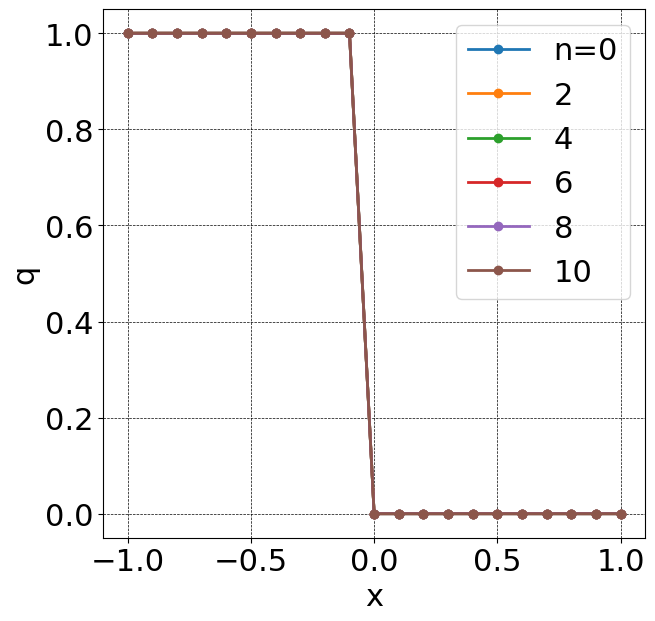

In [9]:
do_computing(x, q, dt, dx, nmax, UPWIND1)

In [11]:
def MC(q, c, dt, dx, j):
  ur = q[j + 1]
  ul = q[j]
  fr = 0.5 * ur**2
  fl = 0.5 * ul**2
  c = 0.5 * (ur + ul)
  return 0.5 * (fr + fl - np.sign(c) * (fr - fl))

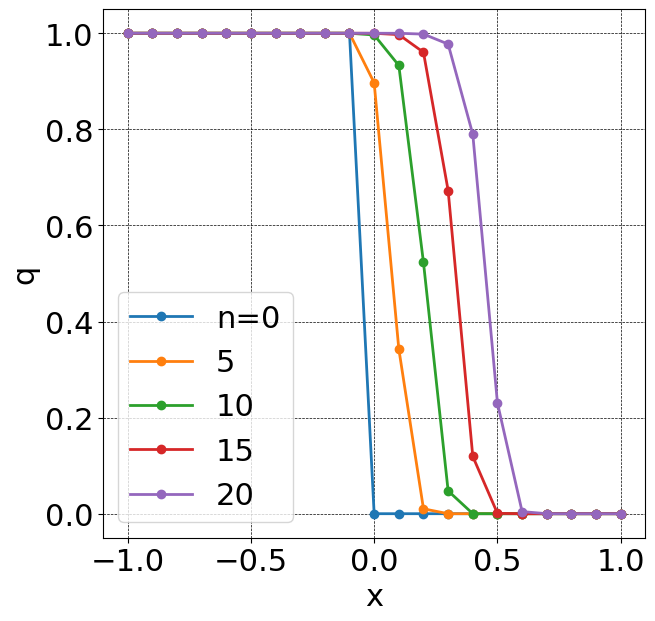

In [12]:
q1 = 1
q2 = 0
x, q = init(q1, q2, dx, jmax)

nmax = 20
do_computing(x, q, dt, dx, nmax, MC, interval=5)

In [13]:
q1 = 2
q2 = 1
x, q = init(q1, q2, dx, jmax)

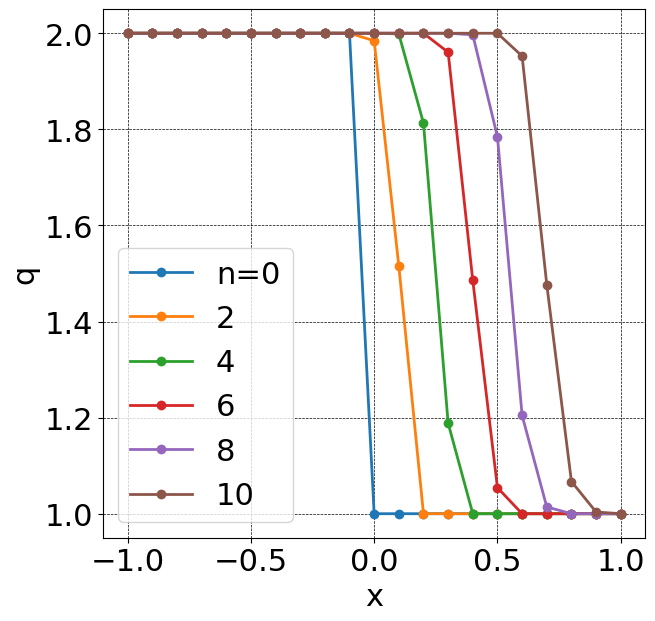

In [14]:
nmax = 10
do_computing(x, q, dt, dx, nmax, MC)

In [15]:
q1 = 1
q2 = 2
x, q = init(q1, q2, dx, jmax)

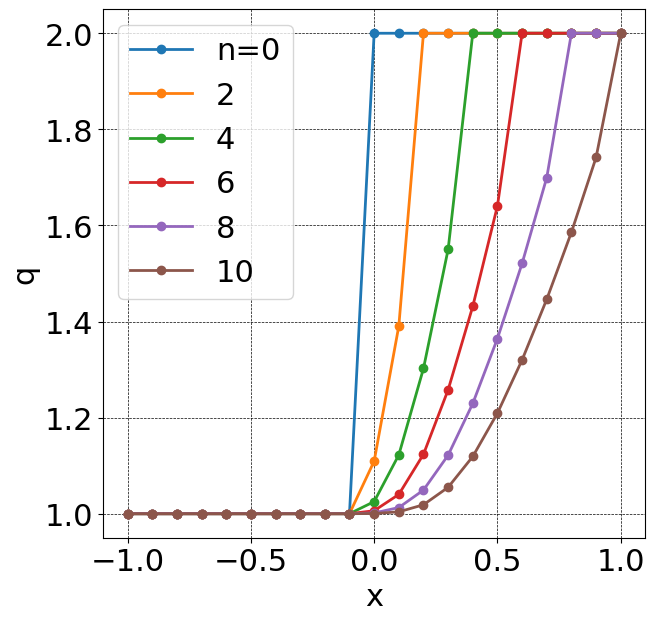

In [16]:
nmax = 10
do_computing(x, q, dt, dx, nmax, MC)

In [17]:
q1 = 1
q2 = -1
x, q = init(q1, q2, dx, jmax)

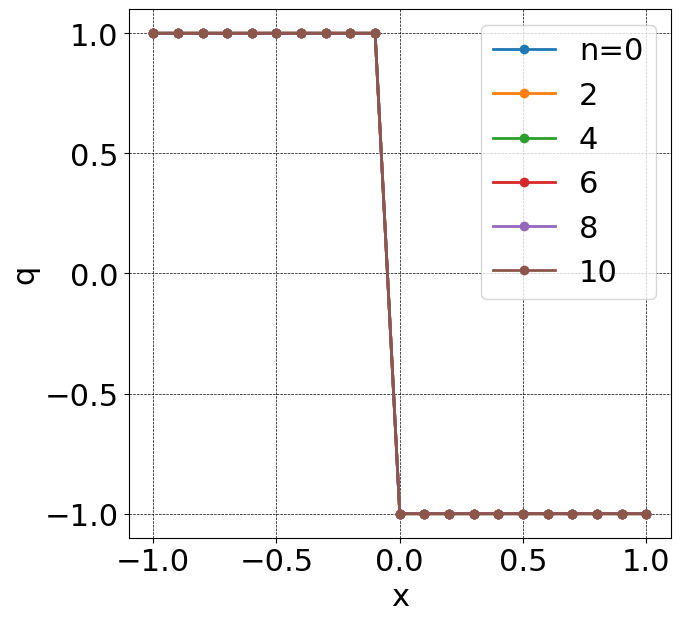

In [18]:
nmax = 10
do_computing(x, q, dt, dx, nmax, MC)

In [19]:
q1 = -1
q2 = 1
x, q = init(q1, q2, dx, jmax)

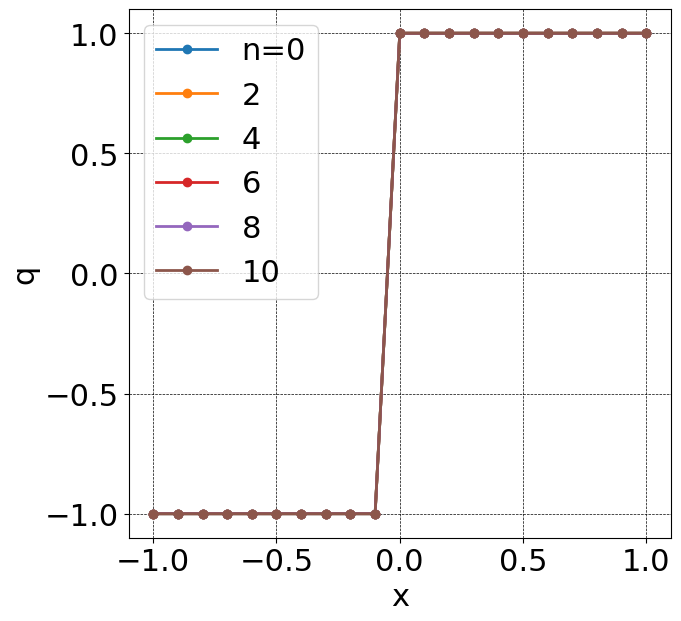

In [20]:
nmax = 10
do_computing(x, q, dt, dx, nmax, MC)

In [21]:
def GODUNOV(q, c, dt, dx, j):
  ur = q[j + 1]
  ul = q[j]
  fr = 0.5 * ur**2
  fl = 0.5 * ul**2
  c = 0.5 * (ur + ul)

  if q[j] <= 0 and q[j+1] <= 0:
    return fr
  elif q[j] >= 0 and q[j+1] >= 0:
    return fl
  elif q[j] > 0 > q[j+1]:
    if c < 0:
      return fr
    else:
      return fl
  else:
    return 0

In [22]:
def GODUNOV(q, c ,dt, dx, j):
  qm = 0.5 * (q[j] + np.abs(q[j]))
  qp = 0.5 * (q[j+1] - np.abs(q[j+1]))
  return np.max([0.5 * qm ** 2, 0.5 * qp ** 2])

In [23]:
q1 = 2
q2 = 1
x, q = init(q1, q2, dx, jmax)

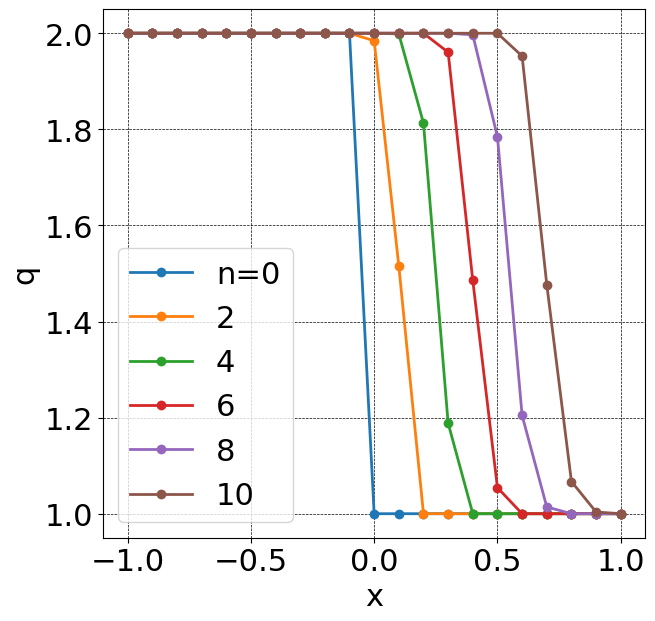

In [25]:
nmax = 10
do_computing(x, q, dt, dx, nmax, GODUNOV)

In [26]:
q1 = 1
q2 = 2
x, q = init(q1, q2, dx, jmax)

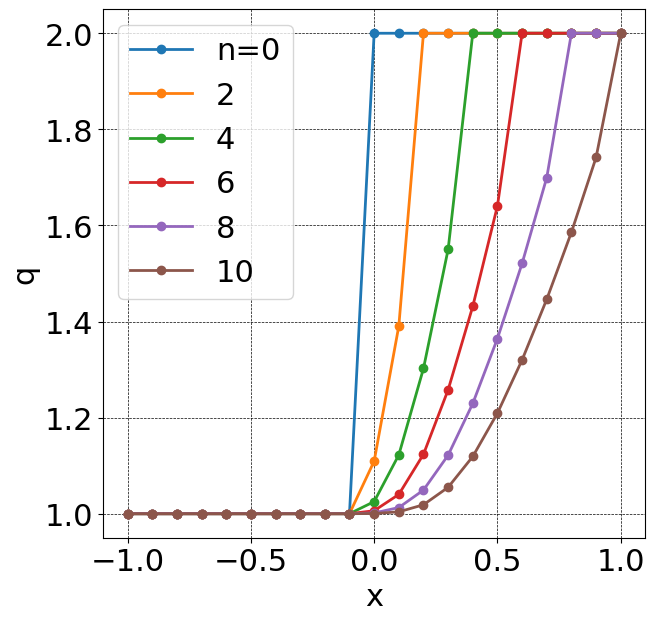

In [27]:
nmax = 10
do_computing(x, q, dt, dx, nmax, GODUNOV)

In [28]:
q1 = 1
q2 = -1
x, q = init(q1, q2, dx, jmax)

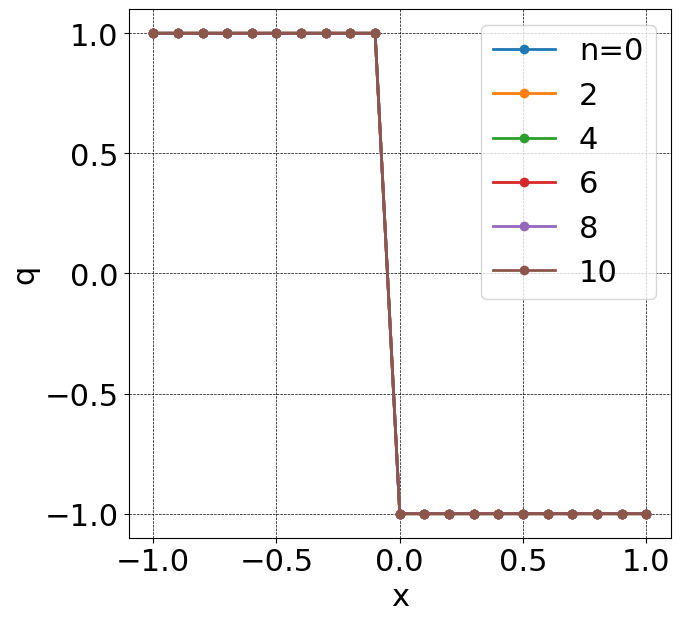

In [29]:
nmax = 10
do_computing(x, q, dt, dx, nmax, GODUNOV)

In [30]:
q1 = -1
q2 = 1
x, q = init(q1, q2, dx, jmax)

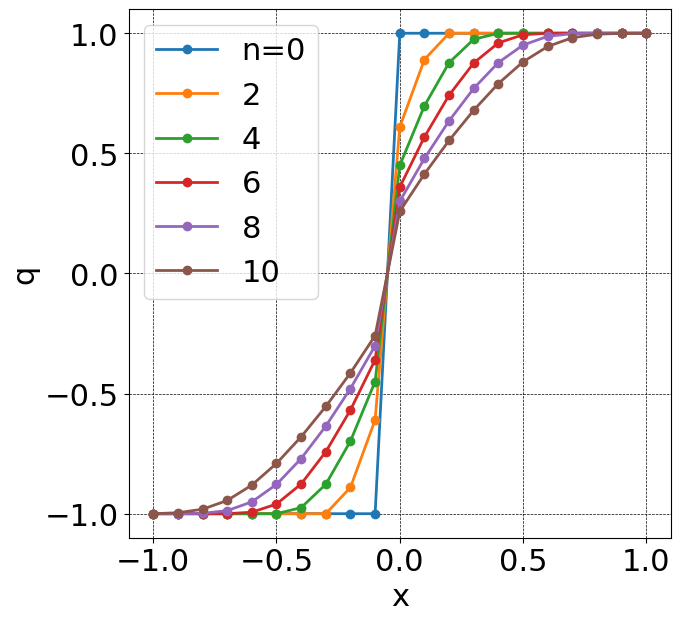

In [31]:
nmax = 10
do_computing(x, q, dt, dx, nmax, GODUNOV)